# Churn de Clientes - Bank Dataset

In [83]:
## ----------------------------------------------------------------
#* Link do dataset
    #  https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers

#* Descrição das variáveis
    #* RowNumber
    #Número da linha do dataset
    #* CustomerId
    #Número randômico e único que identifica o cliente
    #* Surname
    #Sobrenome do cliente
    #* CreditScore
    #Pontuação de crédito atribuida ao cliente
    #* Geography
    #Localização do cliente
    #* Gender
    #Gênero do cliente
    #* Age
    #Idade do cliente
    #* Tenure
    #Fidelidade do cliente | Quantidade de anos que o cliente está na instituição
    #* Balance
    #Saldo do cliente
    #* NumOfProducts
    #Quantidade de produtos que o cliente comprou no banco
    #* HasCrCard
    #Se o cliente possui ou não cartão de crédito sendo 1|Sim e 0|Não
    #* IsActiveMember
    #  - Se o cliente é ativo ou não no banco
    #* EstimatedSalary
    #  - Renda do cliente
    #*Exited
    #  - Se o cliente deixou ou não a instituição sendo 1|Sim e 0|Não  
## ----------------------------------------------------------------

## Importação dos pacotes

In [84]:
## ----------------------------------------------------------------
#* Manipulação de dados
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as st
#* DataViz
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import ydata_profiling
#! Utilizar ydata_profiling em Jupyter notebook
# import sys
# !{sys.executable} -m pip install -U ydata-profiling[notebook]
# !jupyter nbextension enable --py widgetsnbextension
#
from ydata_profiling import ProfileReport
#! Pacotes não utilizados no momento
#import plotly.express as px
#import plotly.io as pio
#import chart_studio.plotly as py
#import plotly.graph_objects as go
#from plotly.subplots import make_subplots
#* Machine Learning
## ----------------------------------------------------------------

## Leitura e tratamento do dataset

In [85]:
df_original = pd.read_csv(filepath_or_buffer = 'churn.csv')
df_original.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [86]:
# Excluir colunas que não serão utilizadas
trash_colunas = {'RowNumber', 'CustomerId', 'Surname'}
# Criando um novo dataframe para os tratamentos
df = df_original.drop(columns = trash_colunas)
del(trash_colunas)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [87]:
#Criar lista com nome das novas variáveis
novas_colunas = {
    'CreditScore': 'Score',
    'Geography': 'Pais',
    'Gender': 'Genero',
    'Age': 'Idade',
    'Tenure': 'Fidelidade',
    'Balance': 'Saldo',
    'NumOfProducts': 'QtdProdutos',
    'HasCrCard': 'TemCartao',
    'IsActiveMember': 'ClienteAtivo',
    'EstimatedSalary': 'Renda',
    'Exited': 'Churn'
    }
#renomeando as variáveis
df.rename(columns = novas_colunas, inplace = True)
#
del(novas_colunas)
#
df.head()

,Score,Pais,Genero,Idade,Fidelidade,Saldo,QtdProdutos,TemCartao,ClienteAtivo,Renda,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Análise Exploratória

In [88]:
# #Criação de perfil para geração de relatório Profiling
# profile = ProfileReport(df, title = 'Bank Churn')
# #Funções para utilização do pacote ydata_profiling em Jupyter
# profile.to_widgets()
# profile.to_notebook_iframe()

In [89]:
# #Salvando o relatório em html
# profile.to_file('churn_Profile.html')

In [90]:
#Informações sobre missing values e tipo das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Score         10000 non-null  int64  
 1   Pais          10000 non-null  object 
 2   Genero        10000 non-null  object 
 3   Idade         10000 non-null  int64  
 4   Fidelidade    10000 non-null  int64  
 5   Saldo         10000 non-null  float64
 6   QtdProdutos   10000 non-null  int64  
 7   TemCartao     10000 non-null  int64  
 8   ClienteAtivo  10000 non-null  int64  
 9   Renda         10000 non-null  float64
 10  Churn         10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [91]:
#Criar lista com o nome das colunas (variáveis)
variaveis = df.columns.to_list()
variaveis

['Score',
 'Pais',
 'Genero',
 'Idade',
 'Fidelidade',
 'Saldo',
 'QtdProdutos',
 'TemCartao',
 'ClienteAtivo',
 'Renda',
 'Churn']

In [92]:
#Mostrar a quantidade de registros em cada variável
df[variaveis].nunique()

Score            460
Pais               3
Genero             2
Idade             70
Fidelidade        11
Saldo           6382
QtdProdutos        4
TemCartao          2
ClienteAtivo       2
Renda           9999
Churn              2
dtype: int64

In [93]:
#Verificar itens contidos na variável Gênero
df['Genero'].unique()

array(['Female', 'Male'], dtype=object)

In [94]:
#Verificar itens contidos na variável Gênero
df['TemCartao'].unique()

array([1, 0], dtype=int64)

In [95]:
df['ClienteAtivo'].unique()

array([1, 0], dtype=int64)

In [96]:
df['Churn'].unique()

array([1, 0], dtype=int64)

In [97]:
# Listar variáveis quantitativa contínuas
var_quantitativas_continuas = [
    variavel for variavel in df.columns
        if df[variavel].dtype == 'float64' and variavel not in 'Churn']
var_quantitativas_continuas

['Saldo', 'Renda']

In [98]:
# Mostrar informaçõs estatísticas das variáveis quantitativas contínuas
df[var_quantitativas_continuas].describe().T

,count,mean,std,min,25%,50%,75%,max
Saldo,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
Renda,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


In [99]:
# Listar variáveis quantitativa discretas
var_quantitativas_discretas = [
    variavel for variavel in df.columns
        if df[variavel].dtype == 'int64' and df[variavel].nunique() > 2 and variavel not in 'Churn']
var_quantitativas_discretas

['Score', 'Idade', 'Fidelidade', 'QtdProdutos']

In [100]:
# Mostrar informaçõs estatísticas das variáveis quantitativas discretas
df[var_quantitativas_discretas].describe().T

,count,mean,std,min,25%,50%,75%,max
Score,10000.0,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Idade,10000.0,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Fidelidade,10000.0,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
QtdProdutos,10000.0,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0


In [101]:
# Listar variáveis qualitativas nominais
var_qualitativas_nominais = [
    variavel for variavel in df.columns
        if df[variavel].dtype == 'object' and variavel not in 'Churn']
var_qualitativas_nominais

['Pais', 'Genero']

In [102]:
# Mostrar informaçõs estatísticas das variáveis qualitativas nominais
df[var_qualitativas_nominais].describe().T

,count,unique,top,freq
Pais,10000,3,France,5014
Genero,10000,2,Male,5457


In [103]:
#Alterando o conteúdo das variáveis categóricas
#* Localização
df['Pais'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Pais, dtype: int64

In [104]:
#Alterando os valores da variável #Localização
df['Pais'].replace({
    'France' : 'França',
    'Germany' : 'Alemanha',
    'Spain' : 'Espanha'
}, inplace = True)
#
df['Pais'].unique()

array(['França', 'Espanha', 'Alemanha'], dtype=object)

In [105]:
#Alterando o conteúdo das variáveis categóricas
#* Gênero
df['Genero'].value_counts()

Male      5457
Female    4543
Name: Genero, dtype: int64

In [106]:
#Alterando os valores da variável 
#* Gênero
df['Genero'].replace({
    'Male' : 'Masculino',
    'Female' : 'Feminino'
}, inplace = True)
#
df['Genero'].unique()

array(['Feminino', 'Masculino'], dtype=object)

In [24]:
# Listar variáveis qualitativas ordinais
var_qualitativas_ordinais = [
    variavel for variavel in df.columns
        if df[variavel].dtype == 'int64' and df[variavel].nunique() == 2 and variavel not in 'Churn']
var_qualitativas_ordinais

['TemCartao', 'ClienteAtivo']

In [107]:
#Alterando os valores da variável 
#* TemCartao
df['TemCartao'].replace(
    {
        0 : 'NaoTemCartao',
        1 : 'TemCartao'
    }, inplace = True
)
df['TemCartao'].unique()
df['TemCartao'].value_counts()

TemCartao       7055
NaoTemCartao    2945
Name: TemCartao, dtype: int64

In [108]:
df['ClienteAtivo'].unique()

array([1, 0], dtype=int64)

In [109]:
#Alterando os valores da variável 
#* ClienteAtivo
df['ClienteAtivo'].replace(
    {
        0 : 'ClienteInativo',
        1 : 'ClienteAtivo'
    }, inplace = True
)
df['ClienteAtivo'].unique()
df['ClienteAtivo'].value_counts()

ClienteAtivo      5151
ClienteInativo    4849
Name: ClienteAtivo, dtype: int64

In [110]:
print(f'Variáveis Quantitativas Contínuas: {var_quantitativas_continuas}')

Variáveis Quantitativas Contínuas: ['Saldo', 'Renda']


### Análise univariada

In [28]:
# Definição do Tema do Seaborn
sns.set_theme(
    context = 'paper', style = 'whitegrid', palette = 'muted',
    font = 'sans-serif', font_scale = 1, color_codes = True, 
    rc = None
)

#### Criação de gráficos - Quantitativas Contínuas

1. Saldo -----

Estatísticas descritivas
count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Saldo, dtype: float64


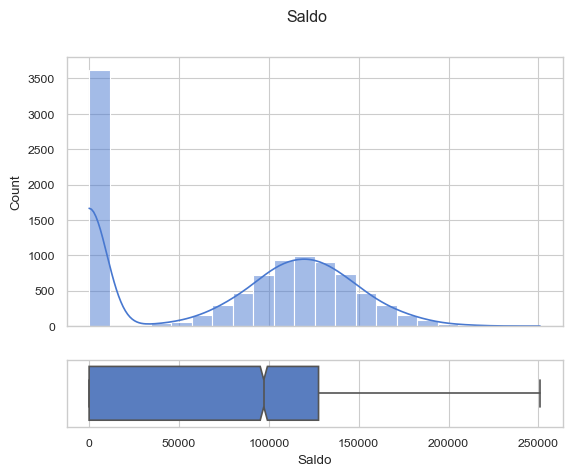

2. Renda -----

Estatísticas descritivas
count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: Renda, dtype: float64


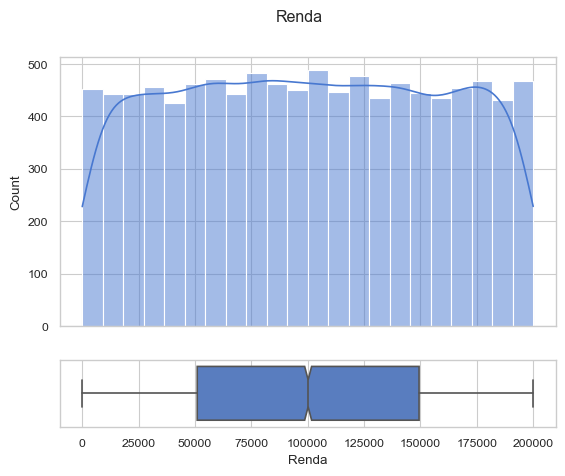

In [29]:
# Geração de gráficos (function)
for n, var, in enumerate(var_quantitativas_continuas, start = 1):
    # Descrição estatística das variáveis
    print(f'{n}. {var} -----', end = '\n''\n')
    print('Estatísticas descritivas', end = '\n')
    print(df[var].describe())
    # Criação dos subplots
    fig, axs = plt.subplots(ncols = 1, nrows = 2, sharex = True, height_ratios = [0.8, 0.2])
    # Título do gráfico 
    fig.suptitle(f'{var}')
    # Gráfico 1 - Histograma
    sns.histplot(data = df, x = var, kde = True, ax = axs[0], stat = 'count', cumulative = False)
    # Gráfico 2 - Boxplot
    sns.boxplot(data = df, x = var, fliersize = 2, notch = True, ax = axs[1])
    #Mostra o gráfico
    plt.show()

#### Criação de gráficos - Quantitativas Discretas

1. Score
------------------------
Estatística descritiva
------------------------
count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: Score, dtype: float64



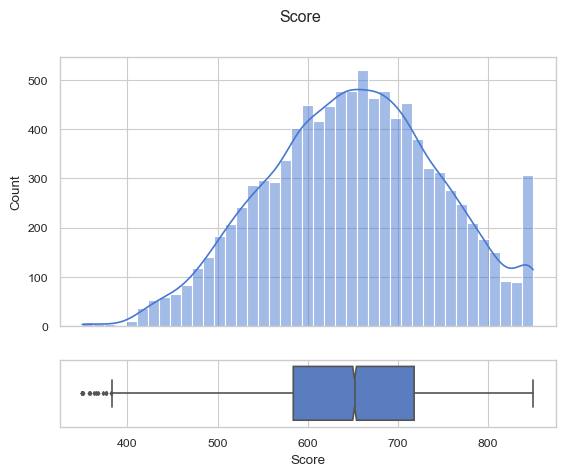

2. Idade
------------------------
Estatística descritiva
------------------------
count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Idade, dtype: float64



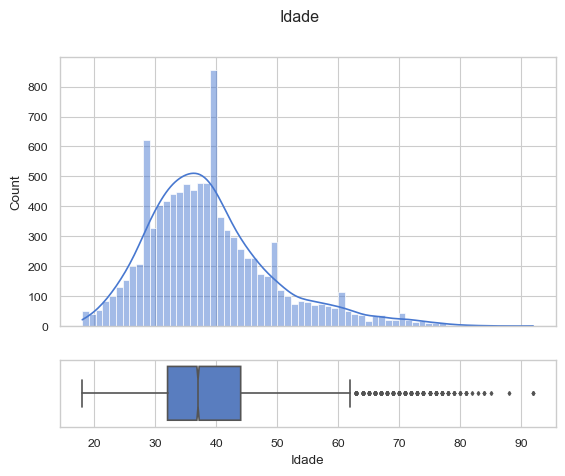

3. Fidelidade
------------------------
Estatística descritiva
------------------------
count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Fidelidade, dtype: float64



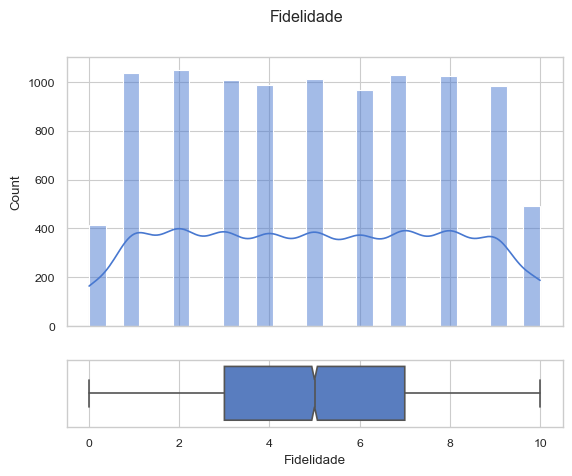

4. QtdProdutos
------------------------
Estatística descritiva
------------------------
count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: QtdProdutos, dtype: float64



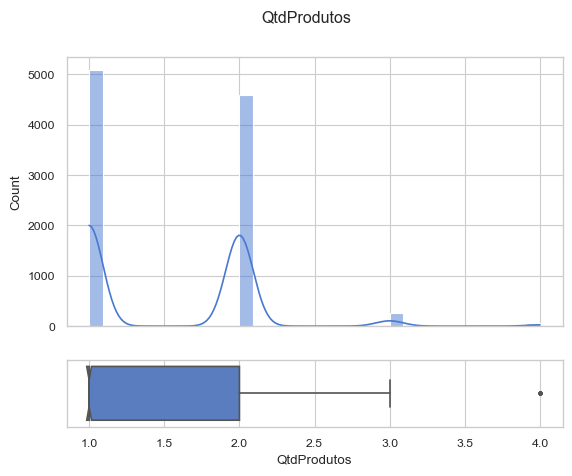

In [30]:
# Geração de gráficos (function)
for n, var, in enumerate(var_quantitativas_discretas, start = 1):
    # Descrição estatística das variáveis
    print(f'{n}. {var}', end = '\n')
    print('------------------------', end = '\n')
    print('Estatística descritiva', end = '\n')
    print('------------------------', end = '\n')
    print(df[var].describe(), end = '\n''\n')
    # Criação dos subplots
    fig, axs = plt.subplots(ncols = 1, nrows = 2, sharex = True, height_ratios = [0.8, 0.2])
    # Título do gráfico 
    fig.suptitle(f'{var}')
    # Gráfico 1 - Histograma
    sns.histplot(data = df, x = var, kde = True, ax = axs[0], stat = 'count', cumulative = False)
    # Gráfico 2 - Boxplot
    sns.boxplot(data = df, x = var, fliersize = 2, notch = True, ax = axs[1])
    #Mostra o gráfico
    plt.show()

#### Criação de gráficos - Qualitativas Nominais

1. Pais
------------------------
Estatística descritiva
------------------------
count      10000
unique         3
top       França
freq        5014
Name: Pais, dtype: object



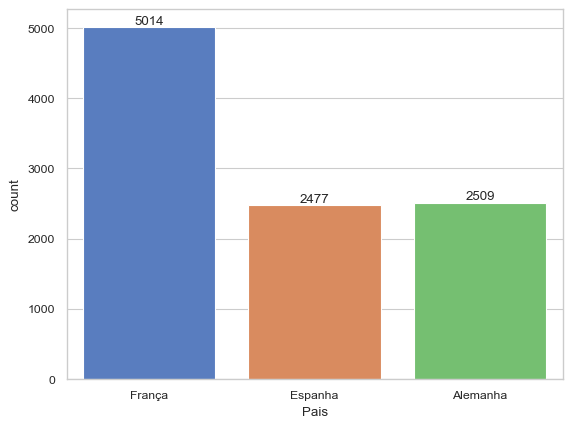

2. Genero
------------------------
Estatística descritiva
------------------------
count         10000
unique            2
top       Masculino
freq           5457
Name: Genero, dtype: object



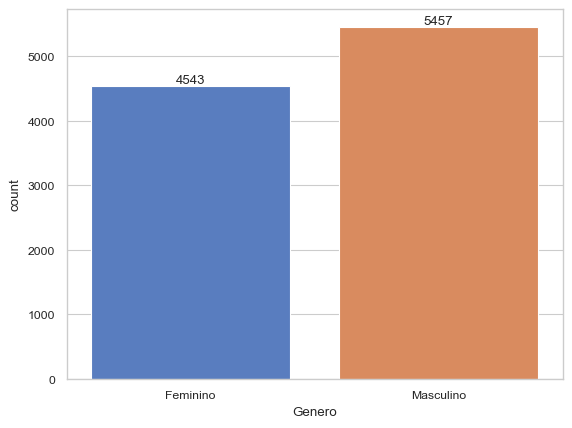

In [31]:
# Geração de gráficos (function)
for n, var, in enumerate(var_qualitativas_nominais, start = 1):
    # Descrição estatística das variáveis
    print(f'{n}. {var}', end = '\n')
    print('------------------------', end = '\n')
    print('Estatística descritiva', end = '\n')
    print('------------------------', end = '\n')
    print(df[var].describe(), end = '\n''\n')
    # Criação dos subplots
    #fig, axs = plt.subplots(ncols = 1, nrows = 2, sharex = True, height_ratios = [0.8, 0.2])
    # Título do gráfico 
    fig.suptitle(f'{var}')
    # Gráfico - Countplot
    ax = sns.countplot(data = df, x = var)
    #Inclusão dos rótulos
    ax.bar_label(ax.containers[0])
    #Mostra o gráfico
    plt.show()

#### Criação de gráficos - Qualitativas Ordinais

1. TemCartao
------------------------
Estatística descritiva
------------------------
count         10000
unique            2
top       TemCartao
freq           7055
Name: TemCartao, dtype: object



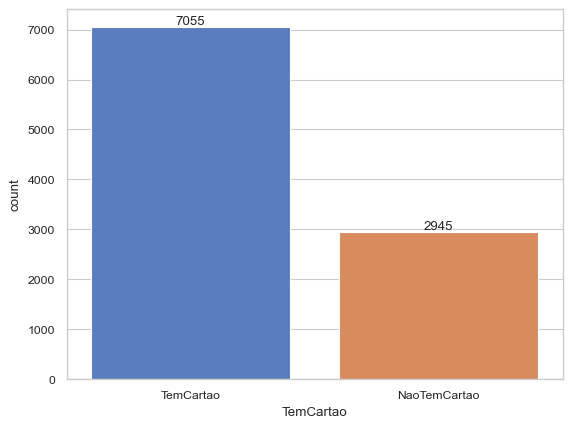

2. ClienteAtivo
------------------------
Estatística descritiva
------------------------
count            10000
unique               2
top       ClienteAtivo
freq              5151
Name: ClienteAtivo, dtype: object



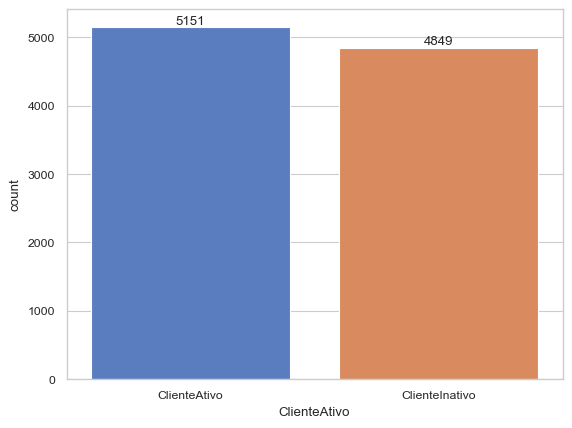

In [32]:
# Geração de gráficos (function)
for n, var, in enumerate(var_qualitativas_ordinais, start = 1):
    # Descrição estatística das variáveis
    print(f'{n}. {var}', end = '\n')
    print('------------------------', end = '\n')
    print('Estatística descritiva', end = '\n')
    print('------------------------', end = '\n')
    print(df[var].describe(), end = '\n''\n')
    # Criação dos subplots
    #fig, axs = plt.subplots(ncols = 1, nrows = 2, sharex = True, height_ratios = [0.8, 0.2])
    # Título do gráfico 
    fig.suptitle(f'{var}')
    # Gráfico - Countplot
    ax = sns.countplot(data = df, x = var)
    #Inclusão dos rótulos
    ax.bar_label(ax.containers[0])
    #Mostra o gráfico
    plt.show()

### Análise bivariada

___________________

3.1.1. Score de Crédito

In [74]:
# #Criação dos subplots
# fig, axs = plt.subplots(ncols = 1, nrows = 2, sharex=True, height_ratios=[0.8, 0.2])
# #Título da imagem
# plt.suptitle('Distribuição do Score de Crédito')
# #Gráfico 1 - Histograma
# sns.histplot(x = df['Score'], kde = True, ax = axs[0], stat = 'count', cumulative = False)
# #Gráfico 2 - Boxplot
# sns.boxplot(x = df['Score'], fliersize = 2, notch = True, ax = axs[1])

3.1.2. Idade

In [75]:
# #Criação dos subplots
# fig, axs = plt.subplots(ncols = 1, nrows = 2, sharex=True, height_ratios=[0.8, 0.2])
# #Título da imagem
# plt.suptitle('Distribuição por Idade')
# #Gráfico 1 - Histograma
# sns.histplot(x = df['Idade'], kde = True, ax = axs[0], stat = 'count', cumulative = False)
# #Gráfico 2 - Boxplot
# sns.boxplot(x = df['Idade'], fliersize = 2, notch = True, ax = axs[1])

3.1.3. Tempo de fidelidade

In [76]:
# print(df['Fidelidade'].describe().T, end = '\n''\n')
# print(df['Fidelidade'].value_counts())

In [77]:
# #Criação dos subplots
# fig, axs = plt.subplots(ncols = 1, nrows = 2, sharex=True, height_ratios=[0.8, 0.2])
# #Título da imagem
# plt.suptitle('Distribuição por tempo de fidelidade do cliente')
# #Gráfico 1 - Histograma
# sns.histplot(x = df['Fidelidade'], kde = False, ax = axs[0], stat = 'count', cumulative = False)
# #Gráfico 2 - Boxplot
# #* Defição dos limites do eixo X
# plt.xlim([df['Fidelidade'].min() - 1, df['Fidelidade'].max() + 1])
# #* Defição da quantidade de ticks
# plt.xticks(range(df['Fidelidade'].max() + 1))
# #
# sns.boxplot(x = df['Fidelidade'], fliersize = 2, whis = 1, notch = True, ax = axs[1])

3.1.4. Saldo

In [ ]:
# #Criação dos subplots
# fig, axs = plt.subplots(ncols = 1, nrows = 2, sharex=True, height_ratios=[0.8, 0.2])
# #Título da imagem
# plt.suptitle('Distribuição por saldo em conta')
# #Gráfico 1 - Histograma
# sns.histplot(x = df['Saldo'], kde = False, ax = axs[0], stat = 'count', cumulative = False)
# #Gráfico 2 - Boxplot
# sns.boxplot(x = df['Saldo'], fliersize = 2, notch = True, ax = axs[1])

3.1.5. Quantidade de produtos

In [ ]:
# print(df['QtdProdutos'].describe().T, end = '\n''\n')
# print(df['QtdProdutos'].value_counts())

In [ ]:
# #Criação dos subplots
# fig, axs = plt.subplots(ncols = 1, nrows = 2, sharex=True, height_ratios=[0.8, 0.2])
# #Título da imagem
# plt.suptitle('Distribuição por quantidade de produtos')
# #Gráfico 1 - Histograma
# sns.histplot(x = df['QtdProdutos'], kde = False, bins = 4, ax = axs[0], stat = 'count', cumulative = False)
# #Gráfico 2 - Boxplot
# #* Defição dos limites do eixo X
# plt.xlim([df['QtdProdutos'].min()+1, df['QtdProdutos'].max()+1])
# #* Defição da quantidade de ticks
# plt.xticks(range(df['QtdProdutos'].max()+1))
# #
# sns.boxplot(x = df['QtdProdutos'], fliersize = 2, notch = True, ax = axs[1])

3.1.6. Salário Estimado

In [ ]:
# #Criação dos subplots
# fig, axs = plt.subplots(ncols = 1, nrows = 2, sharex=True, height_ratios=[0.8, 0.2])
# #Título da imagem
# plt.suptitle('Faixa salarial')
# #Gráfico 1 - Histograma
# sns.histplot(x = df['Renda'], kde = False, ax = axs[0], stat = 'count', cumulative = False)
# #Gráfico 2 - Boxplot
# sns.boxplot(x = df['Renda'], fliersize = 2, notch = True, ax = axs[1])


3.1.7. Cartão de Crédito

In [78]:
# #Título da imagem
# plt.suptitle('Cartão de Crédito')
# ax = sns.countplot(data = df, x = df['TemCartao'])
# #Inclusão dos rótulos
# ax.bar_label(ax.containers[0])

3.1.8. Clientes ativos e inativos

In [ ]:
# #Título da imagem
# plt.suptitle('Clientes ativos e inativos')
# ax = sns.countplot(data = df, x = df['ClienteAtivo'])
# #Inclusão dos rótulos
# ax.bar_label(ax.containers[0])

3.1.9. Churn

In [ ]:
# #Título da imagem
# plt.suptitle('Churn')
# ax = sns.countplot(data = df, x = df['Churn'])
# #Inclusão dos rótulos
# ax.bar_label(ax.containers[0])

3.1.10. País de residência

In [79]:
# #Título da imagem
# plt.suptitle('Clientes por Pais')
# ax = sns.countplot(data = df, x = df['Pais'])
# #Inclusão dos rótulos
# ax.bar_label(ax.containers[0])

3.1.11. Gênero

In [ ]:
# #Título da imagem
# plt.suptitle('Clientes por gênero')
# ax = sns.countplot(data = df, x = df['Genero'])
# #Inclusão dos rótulos
# ax.bar_label(ax.containers[0])

<h5>3.2. Análise bivariada</h5>

Matriz de Correlação

In [63]:
#Matriz de correlação
corr = df.corr()
corr

C:\Users\willy\AppData\Local\Temp\ipykernel_20456\2127074908.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Score,Idade,Fidelidade,Saldo,QtdProdutos,TemCartao,ClienteAtivo,Renda,Churn
Score,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Idade,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Fidelidade,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Saldo,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
QtdProdutos,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
TemCartao,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
ClienteAtivo,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
Renda,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Churn,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [64]:
#Criação da máscara a ser utilizada no heatmap de correlação
mask = np.triu(np.ones_like(corr, dtype = bool))
#Configuração da paleta de divergência
paleta_divergencia = sns.diverging_palette(h_neg = 250, h_pos = 20, s = 75, l = 50, sep = 1, n = 6, center = 'light', as_cmap = False)
paleta_divergencia

[(0.26613466399181535, 0.47369810827813025, 0.7317615976606106),
 (0.5370642947070804, 0.6624089282430076, 0.8193382948975503),
 (0.8106397225972991, 0.8529626273091042, 0.9077702333184445),
 (0.9140860646530862, 0.8246826885128927, 0.8028133239419792),
 (0.8384144678873866, 0.5785740917778832, 0.5129511551488873),
 (0.7634747047461135, 0.3348456555528834, 0.225892295531744)]

Text(0.5, 1.0, 'Matriz de Correlação')

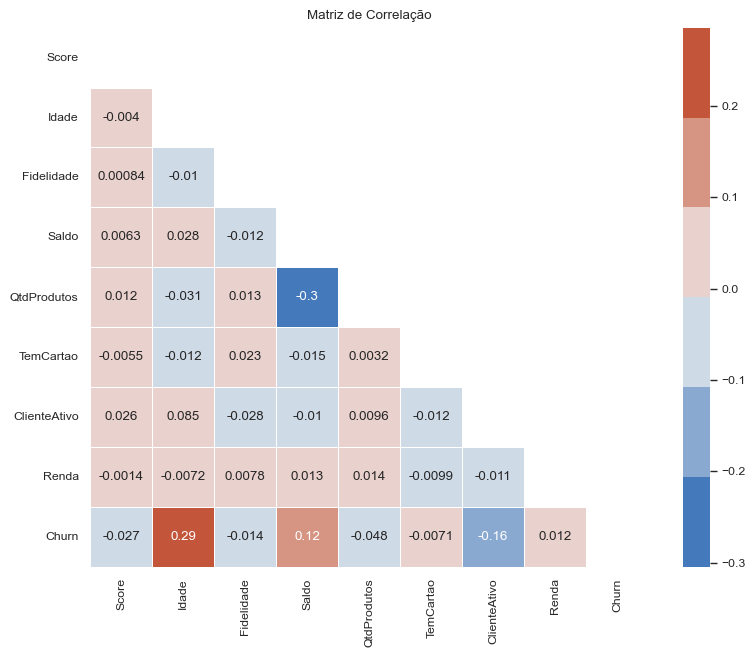

In [65]:
#Criação do gráfico da matriz de correlação
f, ax = plt.subplots(figsize = (9, 7))
sns.heatmap(corr, mask = mask, cmap = paleta_divergencia, linewidths= 0.4, cbar=True, annot = True)
plt.title('Matriz de Correlação')

3.2.1. Churn x Idade

In [ ]:
#Título da imagem
plt.suptitle('Idade x Churn')
#Análise bivariada
sns.boxplot(df, x = df['Idade'], y = df['Churn'].replace({1 : 'Saiu - (1)', 0: 'NaoSaiu - (0)'}), fliersize = 2, notch = True)

3.2.1. Churn x Saldo

In [ ]:
#Título da imagem
plt.suptitle('Saldo x Churn')
#Análise bivariada
sns.boxplot(df, x = df['Saldo'], y = df['Churn'].replace({1 : 'Saiu - (1)', 0: 'NaoSaiu - (0)'}), fliersize = 2, notch = True)

In [ ]:
# Geração de gráficos (function)
for n, var, in enumerate(var_quantitativas_discretas, start = 1):
    # Descrição estatística das variáveis
    print(f'{n}. {var}', end = '\n')
    print('------------------------', end = '\n')
    print('Estatística descritiva', end = '\n')
    print('------------------------', end = '\n')
    print(df[var].describe(), end = '\n''\n')
    # Criação dos subplots
    fig, axs = plt.subplots(ncols = 1, nrows = 2, sharex = True, height_ratios = [0.8, 0.2])
    # Título do gráfico 
    fig.suptitle(f'{var}')
    # Gráfico 1 - Histograma
    sns.histplot(data = df, x = var, kde = True, ax = axs[0], stat = 'count', cumulative = False)
    # Gráfico 2 - Boxplot
    sns.boxplot(data = df, x = var, fliersize = 2, notch = True, ax = axs[1])
    #Mostra o gráfico
    plt.show()

In [ ]:
# #Criando a figura para plotagem dos gráficos
# fig = make_subplots(rows = 2, shared_xaxes = True, vertical_spacing = 0.05, row_heights = [0.6, 0.4])

# #Gráfico 1 - Histograma
# fig.add_trace(go.Histogram(x = df.Saldo), row = 1, col = 1)

# #Gráfico 2 - Boxplot
# fig.add_trace(go.Box(x = df.Saldo, name = '', orientation = 'h'), row = 2, col=1)

# #Alterações de layout    
# fig.update_layout(title = 'Saldo', showlegend = False, title_font_size = 18)

# #Configuração do eixo X    
# fig.update_xaxes(range = [-10000, 300000])

# #Mostrar o gráfico
# fig.show()

In [ ]:
# #Criando a figura para plotagem dos gráficos
# fig = make_subplots(rows = 2, shared_xaxes = True, vertical_spacing = 0.05, row_heights = [0.6, 0.4])

# #Gráfico 1 - Histograma
# fig.add_trace(go.Histogram(x = df.QtdProdutos), row = 1, col = 1)

# #Gráfico 2 - Boxplot
# fig.add_trace(go.Box(x = df.QtdProdutos, name = '', orientation = 'h'), row = 2, col=1)

# #Alterações de layout    
# fig.update_layout(title = 'Quantidade de Produtos', showlegend = False, title_font_size = 18)

# #Configuração do eixo X    
# fig.update_xaxes(range = [0, 5])

# #Mostrar o gráfico
# fig.show()

In [ ]:
# #Criando a figura para plotagem dos gráficos
# fig = make_subplots(rows = 2, shared_xaxes = True, vertical_spacing = 0.05, row_heights = [0.6, 0.4])

# #Gráfico 1 - Histograma
# fig.add_trace(go.Histogram(x = df.Fidelidade), row = 1, col = 1)

# #Gráfico 2 - Boxplot
# fig.add_trace(go.Box(x = df.Fidelidade, name = '', orientation = 'h'), row = 2, col=1)

# #Alterações de layout    
# fig.update_layout(title = 'Tempo de fidelidade (em anos)', showlegend = False, title_font_size = 18)

# #Configuração do eixo X    
# fig.update_xaxes(range = [-5, 15])

# #Mostrar o gráfico
# fig.show()

In [ ]:
#Definição do estilo dos gráficos
# plt.style.use('seaborn-v0_8')
# pio.templates

In [ ]:
# Definição do template dos gráficos
# pio.templates.default = 'seaborn'

In [ ]:
# #Criando a figura para plotagem dos gráficos
# fig = make_subplots(rows = 2, shared_xaxes = True, vertical_spacing = 0.05, row_heights = [0.6, 0.4])

# #Gráfico 1 - Histograma
# fig.add_trace(go.Histogram(x = df.Score), row = 1, col = 1)

# #Gráfico 2 - Boxplot
# fig.add_trace(go.Box(x = df.Score, name = '', orientation = 'h'), row = 2, col=1)

# #Alterações de layout    
# fig.update_layout(title = 'Score de Crédito', showlegend = False, title_font_size = 18)

# #Configuração do eixo X    
# fig.update_xaxes(range = [300, 900])

# #Mostrar o gráfico
# fig.show()

In [ ]:
# df.Idade.describe()

In [ ]:
# #Criando a figura para plotagem dos gráficos
# fig = make_subplots(rows = 2, shared_xaxes = True, vertical_spacing = 0.05, row_heights = [0.6, 0.4])

# #Gráfico 1 - Histograma
# fig.add_trace(go.Histogram(x = df.Idade), row = 1, col = 1)

# #Gráfico 2 - Boxplot
# fig.add_trace(go.Box(x = df.Idade, name = '', orientation = 'h'), row = 2, col=1)

# #Alterações de layout    
# fig.update_layout(title = 'Idade', showlegend = False, title_font_size = 18)

# #Configuração do eixo X    
# fig.update_xaxes(range = [0, 100])

# #Mostrar o gráfico
# fig.show()

In [ ]:
# df.Fidelidade.describe()

In [ ]:
# df.Saldo.describe()

In [ ]:
# df_numericas

In [ ]:
# df.QtdProdutos.describe()